c:\Users\Ayush_trainee\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Ayush_trainee\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


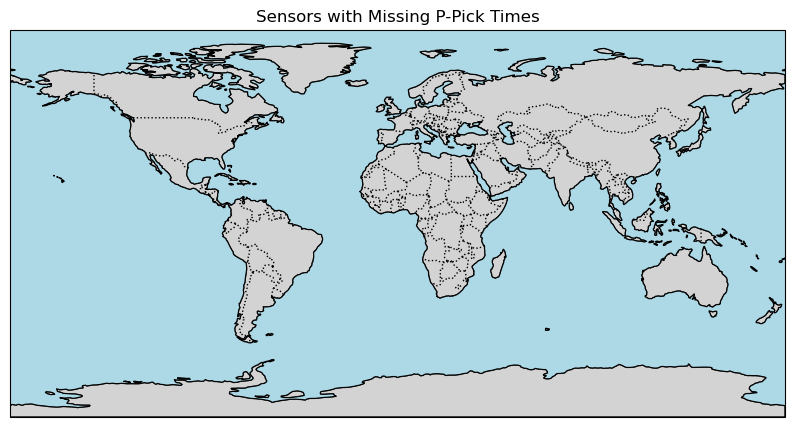

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load metadata
pick_data = pd.read_csv("metadata_above1.csv", usecols=['source_latitude_deg', 'source_longitude_deg', 'trace_p_pick_time'])

# Filter rows where P-pick time is missing
missing_p_picks = pick_data[pd.isna(pick_data['trace_p_pick_time'])]

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title("Sensors with Missing P-Pick Times")

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot sensor locations with missing P-pick times
ax.scatter(missing_p_picks['longitude'], missing_p_picks['latitude'], 
           color='red', marker='o', label='Missing P-Pick', alpha=0.8)

# Labels and legend
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


In [5]:
import folium

# Define map center (average location of missing sensors)
map_center = [missing_p_picks['source_latitude_deg'].mean(), missing_p_picks['source_longitude_deg'].mean()]

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=5)

# Add markers for missing P-pick sensors
for _, row in missing_p_picks.iterrows():
    folium.Marker(
        location=[row['source_latitude_deg'], row['source_longitude_deg']],
        popup="Missing P-Pick",
        icon=folium.Icon(color="red")
    ).add_to(m)

# Save and display map
m.save("missing_p_picks_map.html")
m
